<a href="https://colab.research.google.com/github/dollytwn/nyu-python-public-policy/blob/master/HW_5_Dolly_Wei_Mei_Huang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm # package for doing statistics

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Step 1. load the datasets:
Cleaned 311 data that excludes records with invalid community districts. Shared with you on Google Drive as cleaned_311_data_revised.csv
NYC Open dataset that provides the total count of different types of homeless shelter buildings per community district.
Data source page where you can preview the data: https://data.cityofnewyork.us/Social-Services/Buildings-by-Borough-and-Community-District/3qem-6v3v/data
CSV data download link you can plug into the pd.read_csv() function: https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD

In [4]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
shelter = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')

#Step 2. 
Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'

In [0]:
shelter_filtered = shelter[shelter['Report Date'] == '09/30/2019']

In [7]:
shelter_filtered.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0


#Step 3. 
Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

Tip: There are multiple ways to add these columns together. With one approach, you may find that your total column contains NaN values. This is because many of the columns contains NaN/empty values. When you add a real number to a NaN, the sum will be NaN. To get around this, you will need to fill in all the NaN values with 0 instead. Use the .fillna(0) method on your shelter count dataframe.

In [0]:
sum_individual_count: ['Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter']

In [9]:
shelter_filtered = shelter_filtered.fillna(0)
# quick check
shelter_filtered.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0


In [0]:
shelter_filtered['total'] = shelter_filtered['Adult Family Comm Hotel'] + shelter_filtered['Adult Family Shelter'] + shelter_filtered['Adult Shelter'] + shelter_filtered['Adult Shelter Comm Hotel'] + shelter_filtered['FWC Cluster'] + shelter_filtered['FWC Comm Hotel'] + shelter_filtered['FWC Shelter']

In [11]:
shelter_filtered.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0


#Step 4. 
From the 311 dataset, create a subset of all the 311 requests where complaint_type == 'Homeless Person Assistance'

In [0]:
all_requests = df[df.complaint_type =='Homeless Person Assistance']

In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


#Step 5. 
Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

In [0]:
homeless = df[df.complaint_type == 'Homeless Person Assistance']

In [15]:
count_homeless = homeless.groupby('borocd').size().reset_index(name='count_of_homeless_311_requests')
print(count_homeless)

    borocd  count_of_homeless_311_requests
0    101.0                             758
1    102.0                             965
2    103.0                             520
3    104.0                            1055
4    105.0                            3020
5    106.0                             753
6    107.0                            1684
7    108.0                             633
8    109.0                             303
9    110.0                             283
10   111.0                             373
11   112.0                             262
12   201.0                             188
13   202.0                              40
14   203.0                              47
15   204.0                             122
16   205.0                             101
17   206.0                             108
18   207.0                              88
19   208.0                              99
20   209.0                              57
21   210.0                              30
22   211.0 

#Step 6. 
Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).

Tip: Not all community districts have homeless facilities in them. Use a left join with the 311 complaints as the left table and shelter counts as the right table. After doing this, you should fill in the new NaNs with zeros using the .fillna(0) method on your dataframe.

In [0]:
# merging for 'homelss 311' with the 'shelter count' data frame
merge_data = pd.merge(left=count_homeless, how='left', right=shelter_filtered, left_on='borocd', right_on='Community District')

In [17]:
# quick check
merge_data.head()

,borocd,count_of_homeless_311_requests,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,102.0,965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103.0,520,09/30/2019,Manhattan,103.0,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0


In [18]:
# fill in the new NaNs with zeros using the .fillna(0) method on your dataframe.
merge_data=merge_data.fillna(0)
merge_data.head()

,borocd,count_of_homeless_311_requests,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,102.0,965,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103.0,520,09/30/2019,Manhattan,103.0,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0


#Step 7. 
Produce a scatter plot of the data using the matplotlib package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?

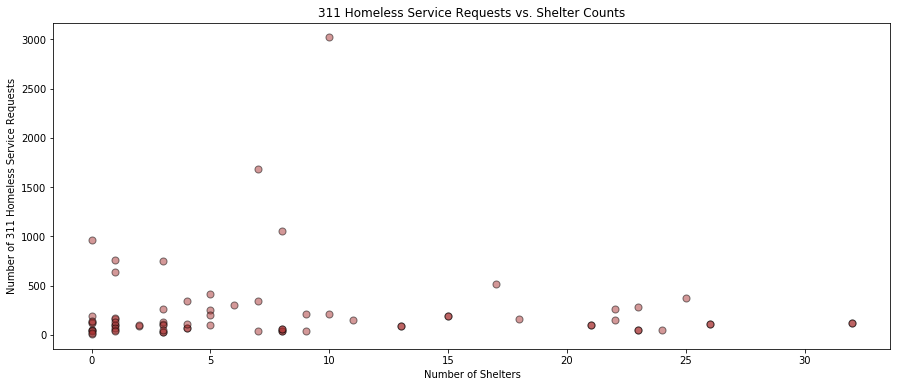

In [19]:
# define the data that will be used
#np.array
# hex color picker: https://www.google.com/search?q=color+picker
x = np.array(merge_data.total)
y = np.array(merge_data.count_of_homeless_311_requests)

color = '#a83232' 
area = 50 

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 


plt.title('311 Homeless Service Requests vs. Shelter Counts')
plt.xlabel('Number of Shelters')
plt.ylabel('Number of 311 Homeless Service Requests') 

plt.show()

#Step 8. 
Use np.corrcoef(x, y) to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

In [20]:
# determine the correlation coefficient using the np.corrcoef() function from numpy

x = np.array(merge_data['total']/1000)
y = np.array(merge_data.count_of_homeless_311_requests)

# produces a matrix of the correlation coefficients
np.corrcoef(x, y)

array([[ 1.        , -0.02042157],
       [-0.02042157,  1.        ]])

#Step 9. 
Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [21]:
# Note that y is the first argument, before x. This is different than plotting and the correlation function.

# y = dependent variable (Number of 311 Homeless Service Requests)
y = np.array(merge_data.count_of_homeless_311_requests)

# x = independent variable (Number of Shelters) with a constant added
x = np.array(merge_data['total']/1000)
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[1.    0.001]
 [1.    0.   ]
 [1.    0.017]
 [1.    0.008]
 [1.    0.01 ]
 [1.    0.003]
 [1.    0.007]
 [1.    0.001]
 [1.    0.006]
 [1.    0.023]
 [1.    0.025]
 [1.    0.003]
 [1.    0.015]
 [1.    0.015]
 [1.    0.008]
 [1.    0.008]
 [1.    0.023]
 [1.    0.023]
 [1.    0.032]
 [1.    0.032]
 [1.    0.021]
 [1.    0.021]
 [1.    0.026]
 [1.    0.026]
 [1.    0.013]
 [1.    0.013]
 [1.    0.001]
 [1.    0.001]
 [1.    0.008]
 [1.    0.008]
 [1.    0.003]
 [1.    0.003]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.004]
 [1.    0.004]
 [1.    0.007]
 [1.    0.005]
 [1.    0.022]
 [1.    0.01 ]
 [1.    0.018]
 [1.    0.004]
 [1.    0.009]
 [1.    0.011]
 [1.    0.002]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.002]
 [1.    0.001]
 [1.    0.001]
 [1.    0.001]
 [1.    0.024]
 [1.    0.004]
 [1.    0.003]
 [1.    0.005]
 [1.    0.005]
 [1.    0.005]
 [1.    0.003]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.003]
 [1.    0.001]
 [1.    0.001]
 [1.    0.007]
 [1.    0.   ]
 [1.    0.022]
 [1.    0.

#Step 10. 
Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package

In [22]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [ 254.28120088 -988.2949462 ]
R2: 0.0004170404635194247


In [23]:
# let's make labels for the lines of the best fit to use on a scatter plot

label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -988.29x + 254.28; R2 = 0.0


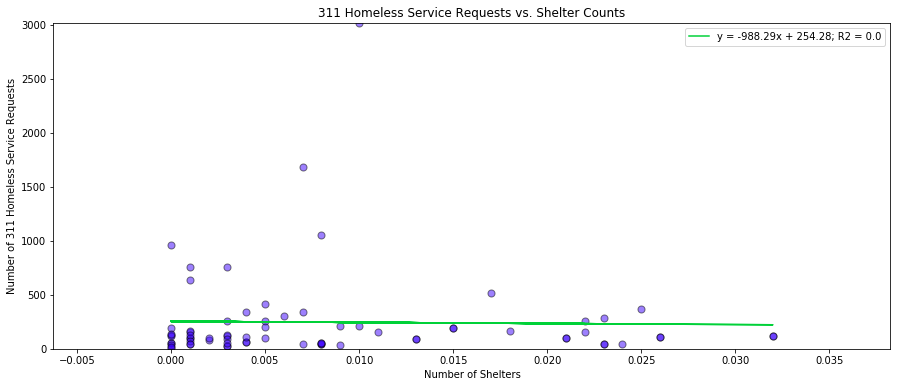

In [24]:
# create an array of x values for the lines of best fit
# x_dummy = np.arange(0,max(merge_data['total])/1000) 
x_dummy = np.array(merge_data['total']/1000)

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merge_data['total']/1000), # x
    np.array(merge_data.count_of_homeless_311_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', # lighter green
    label=label)

plt.ylim(0, max(np.array(merge_data.count_of_homeless_311_requests)))

plt.title('311 Homeless Service Requests vs. Shelter Counts')
plt.xlabel('Number of Shelters')
plt.ylabel('Number of 311 Homeless Service Requests')
plt.legend()

plt.show()

In [0]:
#Using the seaborn package to easily produce pretty regression charts

In [0]:
import seaborn as sns

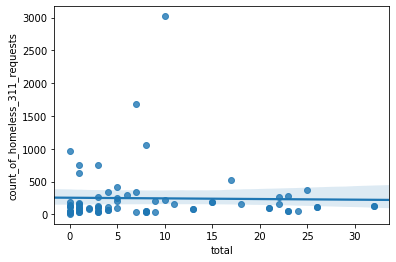

In [27]:
# the .regplot() function makes a nice looking scatter plot with a line of best fit
# it can consume pandas data series from a dataframe

sns.regplot(
    x=merge_data['total'],
    y=merge_data['count_of_homeless_311_requests'])

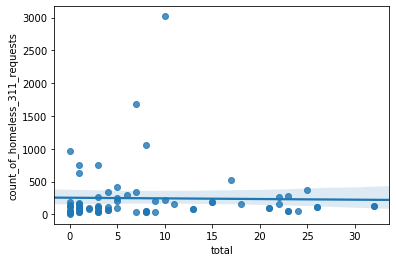

In [28]:
# the .regplot() function makes a nice looking scatter plot with a line of best fit
# it can also consume column names and a specified dataframe

sns.regplot(
    x='total', # note that x and y are the column names in the specified "data" table
    y='count_of_homeless_311_requests',
    data=merge_data)

#Step 11: 
Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?

Based on the results of Step 9, R-squared came out to be 0, which means that the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness is not linear/correlated. However, based on the chart, I'm seeing a few outliers and if we remove those outliers, the relationship will likely to become more correlated. 